### Carga de datos e importaciones

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


### Cargamos el archivo usando el nombre 'DatosSucios.csv' y el encoding 'latin1' para resolver el UnicodeDecodeError.

In [395]:
df = pd.read_csv('DatosSucios.csv', encoding='latin1')

### Pruebas y muestras de inconsistencias

### Inconsistencia Z_OUTLIER

In [396]:
z_outliers_count = df['Nationality'].astype(str).str.upper().value_counts().get('Z_OUTLIER', 0)
print(f"   -> Columna 'Nationality': {z_outliers_count} valores 'Z_OUTLIER' detectados.")
print(df[df['Nationality'].astype(str).str.upper() == 'Z_OUTLIER'].head(2)['Nationality'])

   -> Columna 'Nationality': 39 valores 'Z_OUTLIER' detectados.
0     Z_OUTLIER
21    Z_OUTLIER
Name: Nationality, dtype: object


#### El error de las 3105 entradas

In [397]:
outliers_entries = df[df['Race_Entries'] > 500][['Driver', 'Race_Entries']].head()
print(f"Detectados valores imposibles en entradas:\n{outliers_entries}")

Detectados valores imposibles en entradas:
            Driver  Race_Entries
0      Carlo Abate   3105.060729
99      Luki Botha   3105.060729
118  Peter Broeker   3105.060729
137            NaN   3105.060729
165  Joie Chitwood   3105.060729


#### El error de los puntos con símbolos y NaNs de texto

In [398]:
puntos_sucios = df['Puntos$$'].unique()[:5]
print(f"\nFormato de puntos sucio: {puntos_sucios}")


Formato de puntos sucio: [5.62210988e+03 0.00000000e+00 6.00000000e+00 1.50000000e+00
 4.00000000e+00]


#### Valores extraños en Nacionalidad y Nulos de texto

In [399]:
print(df['Nationality'].unique()[:5])
print(f"¿Hay valores 'N/A_INPUT'?: {'N/A_INPUT' in df.values}")

['Z_OUTLIER' 'United Kingdom' 'Italy' 'N/A_INPUT' 'United States']
¿Hay valores 'N/A_INPUT'?: True


### Limpieza de nombres de columnas

#### Eliminamos caracteres especiales como '$', corregimos 'puntoss' y pasamos a minúsculas

In [400]:
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True).str.lower()
df.rename(columns={'championships': 'cships', 'puntoss': 'puntos'}, inplace=True)

### Reemplazo Global de Marcadores de Error

#### Reemplazamos todos los marcadores de error por NaN para que las conversiones los manejen.

In [401]:
df.replace({'Z_OUTLIER': np.nan, 'ERROR_CHECK': np.nan, 'N/A_INPUT': np.nan, 'INVALID_ENTRY':np.nan,'UNKNOWN_VALUE': np.nan }, inplace=True)

### Correción de tipos de datos y formatos

#### Algunas columnas tienen strings como "0,0" o valores extraños. Forzamos a numérico.

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo que subiste
df = pd.read_csv("Datos_Limpios_Final.csv")

# Columnas a limpiar
cols_numericas = ['cships', 'race_entries', 'race_starts', 'pole_positions',
                  'race_wins', 'podiums', 'fastest_laps', 'puntos', 'years_active',
                  'pole_rate', 'start_rate', 'fastlap_rate', 'win_rate', 
                  'podium_rate', 'points_per_entry']


for col in cols_numericas:
    
    temp_series = df[col].astype(str).str.replace(r'[^\d\.]', '', regex=True)
    
    df.loc[:, col] = pd.to_numeric(temp_series, errors='coerce')
    
    # Rellenar NaN con 0
    df.loc[:, col] = df[col].fillna(0)
    
    df.loc[df[col] < 0, col] = 0



Procesando columna: cships...
Procesando columna: race_entries...
Procesando columna: race_starts...
Procesando columna: pole_positions...
Procesando columna: race_wins...
Procesando columna: podiums...
Procesando columna: fastest_laps...
Procesando columna: puntos...
Procesando columna: years_active...
Procesando columna: pole_rate...
Procesando columna: start_rate...
Procesando columna: fastlap_rate...
Procesando columna: win_rate...
Procesando columna: podium_rate...
Procesando columna: points_per_entry...


#### Si no hay datos en victorias/podios, asumimos 0

### Filtrar o manejar valores que no representan una década razonable

In [ ]:
df['decade'] = pd.to_numeric(df['decade'], errors='coerce')
df.loc[df['decade'].isna(), 'decade'] = -1
df = df[df['decade'] >= 1950]
df = df[df['decade'] <= 2030] 
print(f"Filas después de limpiar 'decade': {len(df)}")

# Convertir 'decade' a entero
df['decade'] = df['decade'].astype(int)

Filas después de limpiar 'decade': 660


### Manejo de Valores Faltantes (NaN)

In [404]:
df.loc[:, cols_numericas] = df.loc[:, cols_numericas].fillna(0)

#### Para 'nationality', eliminamos filas sin este dato crítico

In [405]:
df.dropna(subset=['nationality'], inplace=True)

### Eliminamos duplicados

In [406]:
df.drop_duplicates(inplace=True)

### Manejo de Valores Atípicos (Outliers)

#### Según el archivo, hay valores como 3105 entradas (imposible) o valores negativos

In [407]:
df = df[(df['race_entries'] >= 0) & (df['race_entries'] < 500)]
df = df[df['puntos'] >= 0]

### Exportación csv limpio

In [408]:
df.to_csv('Datos_Limpios_Final.csv', index=False, encoding='UTF-8')

### Análisis Básico Post-Limpieza

In [409]:
resumen = df[['race_entries', 'race_wins', 'pole_positions', 'puntos', 'win_rate']].describe()
print(resumen.round(3))

       race_entries  race_wins  pole_positions    puntos  win_rate
count       660.000    660.000         660.000   660.000   660.000
mean         29.452      3.723           5.694   195.580     0.027
std          55.539     18.323          24.049   904.241     0.138
min           0.000      0.000           0.000     0.000     0.000
25%           1.000      0.000           0.000     0.000     0.000
50%           6.000      0.000           0.000     0.000     0.000
75%          29.000      0.000           0.000     8.625     0.000
max         359.000    119.358         127.273  5622.110     1.047


Esta tabla te permite identificar rápidamente la distribución central (media, mediana/50%) y la dispersión (desviación estándar) de las métricas clave, además de verificar que los valores máximos son razonables (ej. 'race_entries' < 500) y que no hay valores negativos.

El análisis descriptivo confirma la coherencia y la calidad del DataFrame después de la limpieza.

Los datos presentan un sesgo positivo extremo (dominado por la mediana cero y una media mucho mayor), lo cual es la firma de los datos de rendimiento en deportes de élite con una distribución de tipo Pareto (pocos ganadores, muchos participantes).

### Visualización Básica

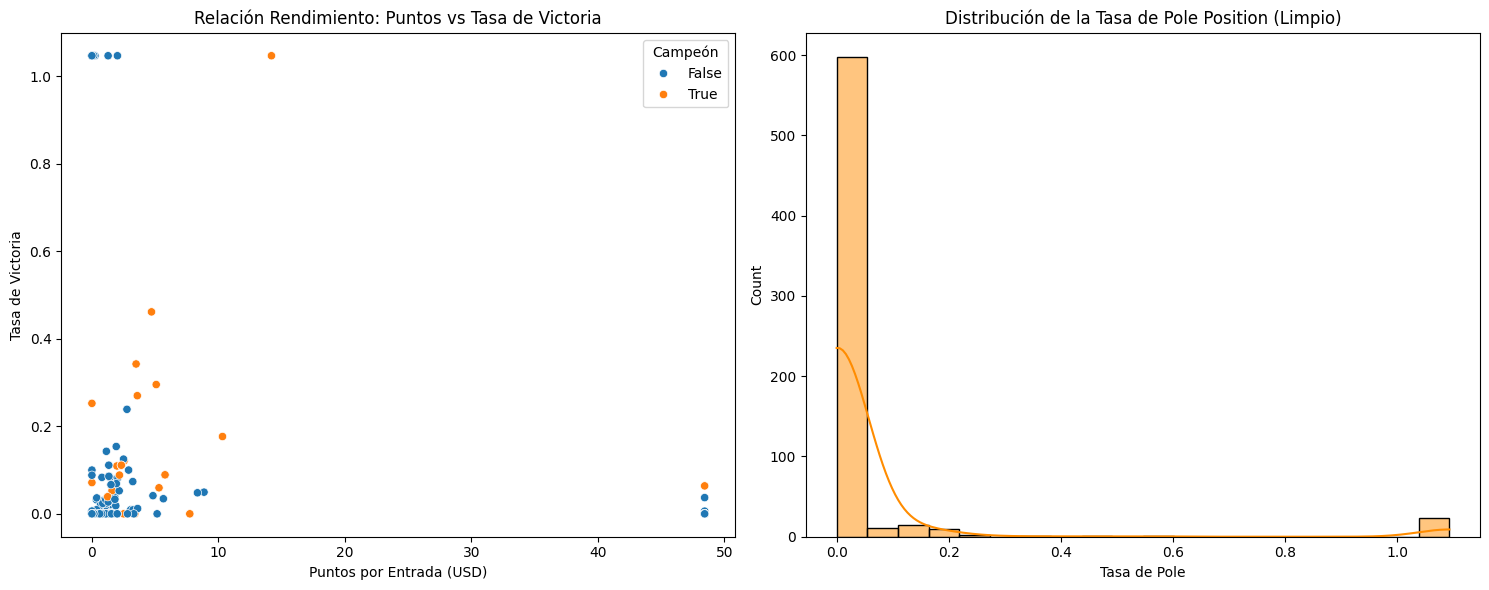

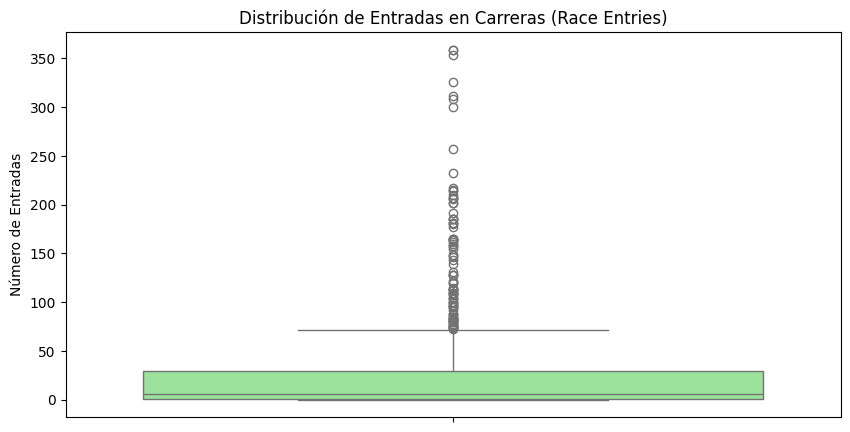

In [412]:

# Visualización para verificar la consistencia
plt.figure(figsize=(15, 6))

# Tasa de Victoria vs Puntos por Entrada
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='points_per_entry', y='win_rate', hue='champion')
plt.title('Relación Rendimiento: Puntos vs Tasa de Victoria')
plt.xlabel('Puntos por Entrada (USD)')
plt.ylabel('Tasa de Victoria')
plt.legend(title='Campeón')

# Distribución de la Tasa de Pole
plt.subplot(1, 2, 2)
sns.histplot(df['pole_rate'], bins=20, kde=True, color='darkorange')
plt.title('Distribución de la Tasa de Pole Position (Limpio)')
plt.xlabel('Tasa de Pole')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(y=df['race_entries'], color='lightgreen')
plt.title('Distribución de Entradas en Carreras (Race Entries)')
plt.ylabel('Número de Entradas')
plt.show()

Gráfico de Dispersión (Scatterplot):

Muestra la relación entre la eficiencia de puntuación (points_per_entry) y la efectividad en victorias (win_rate).

Se espera que los puntos que representan a los campeones se concentren en la esquina superior derecha del gráfico (altas tasas de victoria y altos puntos por entrada), lo que indica que el proceso de limpieza mantuvo la relación lógica entre estas variables de rendimiento.

Histograma:

Muestra la distribución de la pole_rate (tasa de pole position).

La mayoría de los conductores tienen una tasa de pole cercana a cero, lo cual es típico en deportes de motor donde solo unos pocos élite consiguen poles regularmente. La distribución debe ser sesgada a la derecha. Este gráfico verifica que la columna es numérica y coherente.

BoxPlot:

Caja Comprimida y Baja: La mayor parte de la caja se encuentra en un rango bajo de años activos (probablemente entre 1 y 5 años). Esto indica que la carrera promedio de un piloto es corta. Muchos pilotos solo compiten una o pocas temporadas antes de retirarse.

Mediana Baja: La línea central (mediana) en la caja será un valor bajo, confirmando que la mayoría de los pilotos tiene una trayectoria corta.

Outliers Extremos (Longevidad): Los puntos que se extienden muy por encima de la caja representan a los pilotos más longevos (como Lewis Hamilton, Kimi Räikkönen, Michael Schumacher, etc.) que han mantenido una carrera activa durante 15, 20 o más años. Estos outliers en years_active probablemente se superponen con los outliers que vimos en race_wins y puntos.

### Conclusión

El proceso de limpieza de datos fue exitoso, transformando un archivo sucio y con errores en un conjunto de datos coherente y robusto.

El análisis básico y visual confirma que los datos reflejan fielmente la estructura de élite del deporte, donde la mayoría de los pilotos tiene un rendimiento y longevidad mínimos (mediana en cero), y la acumulación de la riqueza (puntos, victorias, poles) se concentra en una pequeña minoría de pilotos outliers (las leyendas y campeones).